In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read from txt & store in dataframe.

In [ ]:
import pandas as pd 
df=pd.read_csv('/content/drive/MyDrive/train-perceptron.txt',sep='\s+',header=None)
df = pd.DataFrame(df)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

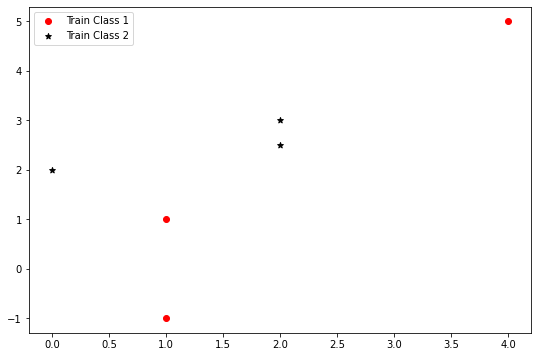

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
x = df[0]
y = df[1]
L = df[2]

plt.rcParams["figure.figsize"] = (9,6)
plt.scatter(x[L==1], y[L==1], marker='o', c='red',label='Train Class 1')
plt.scatter(x[L==2], y[L==2], marker='*', c='black',label='Train Class 2')
plt.legend()

In [ ]:
x=x.to_numpy()
y=y.to_numpy()
L=L.to_numpy()

In [ ]:
train=[]
for i in zip(zip(x,y),L):
  train.append(i)

In [ ]:
train

[((1, 1.0), 1),
 ((1, -1.0), 1),
 ((2, 2.5), 2),
 ((0, 2.0), 2),
 ((2, 3.0), 2),
 ((4, 5.0), 1)]

In [ ]:
train=np.array(train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
train

array([[(1, 1.0), 1],
       [(1, -1.0), 1],
       [(2, 2.5), 2],
       [(0, 2.0), 2],
       [(2, 3.0), 2],
       [(4, 5.0), 1]], dtype=object)

In [ ]:
tc1=[]
tc2=[]
for i in range(len(train)):
  if train[i][1]==1:
    tc1.append(train[i][0])
  else:
    tc2.append(train[i][0])

In [ ]:
tc2

[(2, 2.5), (0, 2.0), (2, 3.0)]

In [ ]:
y=[]

In [ ]:
# k=[]
# l=[]
for i in range(3):
    y.append((tc1[i][0])**2)
    y.append((tc1[i][1])**2)
    y.append(tc1[i][0]*tc1[i][1])
    y.append(tc1[i][0])
    y.append(tc1[i][1])
    y.append(1)
    y.append(-(tc2[i][0])**2)
    y.append(-(tc2[i][1])**2)
    y.append(-(tc2[i][0]*tc2[i][1]))
    y.append(-tc2[i][0])
    y.append(-tc2[i][1])
    y.append(-1)
    # k.append(tc1[i][j])
    # l.append(tc2[i][j])

In [ ]:
y=np.array(y).reshape(6,6)
# y=np.transpose(y)

In [ ]:
y

array([[ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [-4.  , -6.25, -5.  , -2.  , -2.5 , -1.  ],
       [ 1.  ,  1.  , -1.  ,  1.  , -1.  ,  1.  ],
       [ 0.  , -4.  , -0.  ,  0.  , -2.  , -1.  ],
       [16.  , 25.  , 20.  ,  4.  ,  5.  ,  1.  ],
       [-4.  , -9.  , -6.  , -2.  , -3.  , -1.  ]])

In [ ]:
y=y[[0,2,4,1,3,5],:]

In [ ]:
y

array([[ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.  , -1.  ,  1.  , -1.  ,  1.  ],
       [16.  , 25.  , 20.  ,  4.  ,  5.  ,  1.  ],
       [-4.  , -6.25, -5.  , -2.  , -2.5 , -1.  ],
       [ 0.  , -4.  , -0.  ,  0.  , -2.  , -1.  ],
       [-4.  , -9.  , -6.  , -2.  , -3.  , -1.  ]])

In [ ]:
w=np.ones((1,6))

In [ ]:
w

array([[1., 1., 1., 1., 1., 1.]])

In [ ]:
lr=0.1

In [ ]:
flag,cnt=0,0

In [ ]:
g=np.zeros((1,1))

In [ ]:
g

array([[0.]])

In [ ]:
lr=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
resS1=[0]*len(lr)

for j in range(len(lr)):
  w=np.ones((1,6))
  flag,cnt=0,0
  g=np.zeros((1,1))
  sum=0
  while cnt<200:
    cnt=cnt+1
    flag=0
    for i in range(6):
      g=np.matmul(y[i,:],np.transpose(w))
      if g<=0:
        w=w+lr[j]*y[i,:]
      else:
        flag+=1
    if flag==6:
      break
  print("\nfor ",round(.1*(j+1),1),"learning rate: ")
  print("Updated W: ",w)
  print("One at a time iteration: ",cnt)
  resS1[j]=cnt
print("\nList of iterations for single update init with ones: ",resS1)



for  0.1 learning rate: 
Updated W:  [[ 1.    -1.025  0.7    0.2   -0.75   0.1  ]]
One at a time iteration:  6

for  0.2 learning rate: 
Updated W:  [[10.  -6.7  4.4 -1.2 -9.4  3.2]]
One at a time iteration:  92

for  0.3 learning rate: 
Updated W:  [[ 16.3 -10.7   6.7  -2.3 -15.2   5.5]]
One at a time iteration:  104

for  0.4 learning rate: 
Updated W:  [[ 22.2 -14.3   9.8  -2.6 -20.4   7.4]]
One at a time iteration:  106

for  0.5 learning rate: 
Updated W:  [[ 25.   -16.75  11.    -3.   -23.5    8.  ]]
One at a time iteration:  93

for  0.6 learning rate: 
Updated W:  [[ 29.2 -18.5  12.4  -4.4 -27.8   9.4]]
One at a time iteration:  93

for  0.7 learning rate: 
Updated W:  [[ 38.8   -25.075  17.1    -4.6   -35.75   12.9  ]]
One at a time iteration:  108

for  0.8 learning rate: 
Updated W:  [[ 45.8 -31.2  19.4  -5.4 -42.6  16.2]]
One at a time iteration:  115

for  0.9 learning rate: 
Updated W:  [[ 45.1  -30.05  19.9   -5.3  -42.2   14.5 ]]
One at a time iteration:  94

for  1.0 

In [ ]:
lr=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
resM1=[0]*len(lr)

for j in range(len(lr)):
  sum=0
  g=np.zeros((1,1))
  flag,cnt=0,0
  w=np.ones((1,6))
  while cnt<200:
    cnt=cnt+1
    flag=0
    sum=0
    for i in range(6):
      g=np.matmul(y[i,:],np.transpose(w))
      if g<=0:
        sum=sum+y[i,:]
      else:
        flag+=1
    if flag==6:
      break
    w=w+ lr[j]*sum
  print("\nfor ",round(.1*(j+1),1),"learning rate: ")
  print("Updated W: ",w)
  print("Many at a time iteration: ",cnt)
  resM1[j]=cnt
print("\nList of iterations for batch update init with ones: ",resM1)


for  0.1 learning rate: 
Updated W:  [[ 6.5   -4.425  2.8   -0.5   -5.45   1.2  ]]
Many at a time iteration:  102

for  0.2 learning rate: 
Updated W:  [[ 13.    -8.85   5.6   -1.   -10.9    2.4 ]]
Many at a time iteration:  104

for  0.3 learning rate: 
Updated W:  [[ 17.8   -11.825   7.9    -1.4   -15.05    2.8  ]]
Many at a time iteration:  91

for  0.4 learning rate: 
Updated W:  [[ 26.6 -18.   11.4  -2.2 -22.6   5.4]]
Many at a time iteration:  116

for  0.5 learning rate: 
Updated W:  [[ 32.5   -22.125  14.     -2.5   -27.25    6.   ]]
Many at a time iteration:  105

for  0.6 learning rate: 
Updated W:  [[ 40.  -26.9  17.2  -3.2 -33.8   8.2]]
Many at a time iteration:  114

for  0.7 learning rate: 
Updated W:  [[ 41.6   -27.525  18.5    -3.2   -35.05    6.6  ]]
Many at a time iteration:  91

for  0.8 learning rate: 
Updated W:  [[ 47.4 -31.6  21.   -3.8 -40.2   7.4]]
Many at a time iteration:  91

for  0.9 learning rate: 
Updated W:  [[ 57.7  -38.15  25.3   -5.3  -49.4   10.  ]]

In [ ]:
lr=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
resS2=[0]*len(lr)

for j in range(len(lr)):
  w=np.zeros((1,6))
  flag,cnt=0,0
  g=np.zeros((1,1))
  sum=0
  while cnt<200:
    cnt=cnt+1
    flag=0
    for i in range(6):
      g=np.matmul(y[i,:],np.transpose(w))
      if g<=0:
        w=w+lr[j]*y[i,:]
      else:
        flag+=1
    if flag==6:
      break
  print("\nfor ",round(.1*(j+1),1),"learning rate: ")
  print("Updated W: ",w)
  print("One at a time iteration: ",cnt)
  resS2[j]=cnt
print("\nList of iterations for single update init with zeros: ",resS2)


for  0.1 learning rate: 
Updated W:  [[ 5.   -3.35  2.2  -0.6  -4.7   1.6 ]]
One at a time iteration:  94

for  0.2 learning rate: 
Updated W:  [[10.  -6.7  4.4 -1.2 -9.4  3.2]]
One at a time iteration:  94

for  0.3 learning rate: 
Updated W:  [[ 15.   -10.05   6.6   -1.8  -14.1    4.8 ]]
One at a time iteration:  94

for  0.4 learning rate: 
Updated W:  [[ 20.  -13.4   8.8  -2.4 -18.8   6.4]]
One at a time iteration:  94

for  0.5 learning rate: 
Updated W:  [[ 25.   -16.75  11.    -3.   -23.5    8.  ]]
One at a time iteration:  94

for  0.6 learning rate: 
Updated W:  [[ 30.  -20.1  13.2  -3.6 -28.2   9.6]]
One at a time iteration:  94

for  0.7 learning rate: 
Updated W:  [[ 35.   -23.45  15.4   -4.2  -32.9   11.2 ]]
One at a time iteration:  94

for  0.8 learning rate: 
Updated W:  [[ 40.  -26.8  17.6  -4.8 -37.6  12.8]]
One at a time iteration:  94

for  0.9 learning rate: 
Updated W:  [[ 45.   -30.15  19.8   -5.4  -42.3   14.4 ]]
One at a time iteration:  94

for  1.0 learning 

In [ ]:
lr=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
resM2=[0]*len(lr)
for j in range(len(lr)):
  sum=0
  g=np.zeros((1,1))
  flag,cnt=0,0
  w=np.zeros((1,6))
  while cnt<200:
    cnt=cnt+1
    flag=0
    sum=0
    for i in range(6):
      g=np.matmul(y[i,:],np.transpose(w))
      if g<=0:
        sum=sum+y[i,:]
      else:
        flag+=1
    if flag==6:
      break
    w=w+ lr[j]*sum
  print("\nfor ",round(.1*(j+1),1),"learning rate: ")
  print("Updated W: ",w)
  print("Many at a time iteration: ",cnt)
  resM2[j]=cnt
print("\nList of iterations for batch update init with zeros: ",resM2)


for  0.1 learning rate: 
Updated W:  [[ 6.5   -4.425  2.8   -0.5   -5.45   1.2  ]]
Many at a time iteration:  105

for  0.2 learning rate: 
Updated W:  [[ 13.    -8.85   5.6   -1.   -10.9    2.4 ]]
Many at a time iteration:  105

for  0.3 learning rate: 
Updated W:  [[ 19.5   -13.275   8.4    -1.5   -16.35    3.6  ]]
Many at a time iteration:  105

for  0.4 learning rate: 
Updated W:  [[ 26.  -17.7  11.2  -2.  -21.8   4.8]]
Many at a time iteration:  105

for  0.5 learning rate: 
Updated W:  [[ 30.    -19.375  12.5    -2.    -25.75    5.   ]]
Many at a time iteration:  92

for  0.6 learning rate: 
Updated W:  [[ 39.   -26.55  16.8   -3.   -32.7    7.2 ]]
Many at a time iteration:  105

for  0.7 learning rate: 
Updated W:  [[ 42.    -27.125  17.5    -2.8   -36.05    7.   ]]
Many at a time iteration:  92

for  0.8 learning rate: 
Updated W:  [[ 52.  -35.4  22.4  -4.  -43.6   9.6]]
Many at a time iteration:  105

for  0.9 learning rate: 
Updated W:  [[ 58.5   -39.825  25.2    -4.5   -49.

In [ ]:
lr=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
resS3=[0]*len(lr)

for j in range(len(lr)):
  np.random.seed(10)
  w = np.random.random((1, 6))
  flag,cnt=0,0
  g=np.zeros((1,1))
  sum=0
  while cnt<200:
    cnt=cnt+1
    flag=0
    for i in range(6):
      g=np.matmul(y[i,:],np.transpose(w))
      if g<=0:
        w=w+lr[j]*y[i,:]
      else:
        flag+=1
    if flag==6:
      break
  print("\nfor ",round(.1*(j+1),1),"learning rate: ")
  print("Updated W: ",w)
  print("One at a time iteration: ",cnt)
  resS3[j]=cnt
print("\nList of iterations for single update random init: ",resS3)


for  0.1 learning rate: 
Updated W:  [[ 5.57132064 -3.67924805  2.43364823 -0.45119612 -4.80149299  1.42479665]]
One at a time iteration:  97

for  0.2 learning rate: 
Updated W:  [[10.57132064 -6.62924805  4.63364823 -1.45119612 -9.80149299  2.82479665]]
One at a time iteration:  95

for  0.3 learning rate: 
Updated W:  [[ 14.87132064  -9.72924805   6.33364823  -1.95119612 -13.90149299
    4.42479665]]
One at a time iteration:  93

for  0.4 learning rate: 
Updated W:  [[ 20.77132064 -13.77924805   8.63364823  -2.45119612 -19.10149299
    7.02479665]]
One at a time iteration:  101

for  0.5 learning rate: 
Updated W:  [[ 27.27132064 -17.10424805  11.63364823  -3.75119612 -25.25149299
    8.72479665]]
One at a time iteration:  106

for  0.6 learning rate: 
Updated W:  [[ 33.77132064 -22.32924805  13.83364823  -4.65119612 -31.60149299
   11.62479665]]
One at a time iteration:  113

for  0.7 learning rate: 
Updated W:  [[ 34.37132064 -22.02924805  14.63364823  -4.85119612 -32.40149299
  

In [ ]:
lr=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
resM3=[0]*len(lr)

for j in range(len(lr)):
  np.random.seed(10)
  w = np.random.random((1, 6))
  flag,cnt=0,0
  g=np.zeros((1,1))
  sum=0
  while cnt<200:
    cnt=cnt+1
    flag=0
    sum=0
    for i in range(6):
      g=np.matmul(y[i,:],np.transpose(w))
      if g<=0:
        sum=sum+y[i,:]
      else:
        flag+=1
    if flag==6:
      break
    w=w+ lr[j]*sum
  print("\nfor ",round(.1*(j+1),1),"learning rate: ")
  print("Updated W: ",w)
  print("Many at a time iteration: ",cnt)
  resM3[j]=cnt
print("\nList of iterations for batch update random init: ",resM3)


for  0.1 learning rate: 
Updated W:  [[ 5.77132064 -3.90424805  2.53364823 -0.25119612 -4.65149299  0.62479665]]
Many at a time iteration:  84

for  0.2 learning rate: 
Updated W:  [[ 12.17132064  -8.32924805   5.43364823  -0.65119612 -10.00149299
    1.62479665]]
Many at a time iteration:  91

for  0.3 learning rate: 
Updated W:  [[ 20.27132064 -13.92924805   8.73364823  -1.35119612 -16.90149299
    3.82479665]]
Many at a time iteration:  117

for  0.4 learning rate: 
Updated W:  [[ 28.77132064 -18.57924805  11.83364823  -2.45119612 -25.10149299
    5.82479665]]
Many at a time iteration:  133

for  0.5 learning rate: 
Updated W:  [[ 30.27132064 -19.85424805  12.63364823  -1.75119612 -25.75149299
    4.72479665]]
Many at a time iteration:  90

for  0.6 learning rate: 
Updated W:  [[ 39.77132064 -26.52924805  16.23364823  -2.25119612 -33.40149299
    7.42479665]]
Many at a time iteration:  105

for  0.7 learning rate: 
Updated W:  [[ 39.97132064 -26.05424805  16.73364823  -2.05119612 -

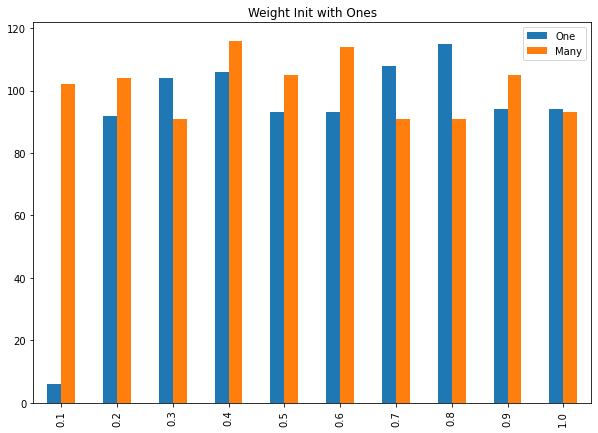

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = (10,7)

X = np.array(lr)
Y = resS1
Z = resM1

df = pd.DataFrame(np.c_[Y,Z], index=X)
df.plot.bar()

plt.title("Weight Init with Ones")
plt.legend(["One", "Many"])
plt.show()

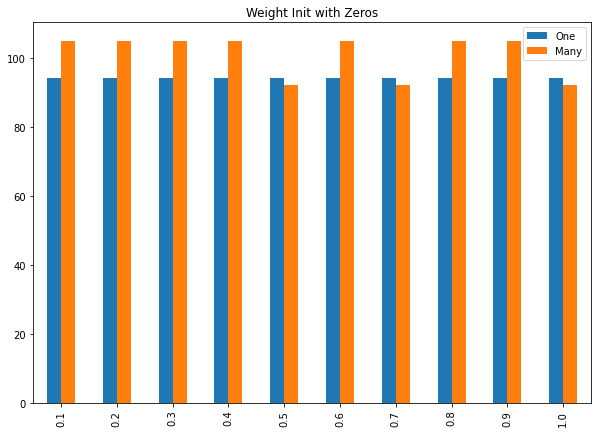

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = (10,7)

X = np.array(lr)
Y = resS2
Z = resM2

df = pd.DataFrame(np.c_[Y,Z], index=X)
df.plot.bar()

plt.title("Weight Init with Zeros")
plt.legend(["One", "Many"])
plt.show()

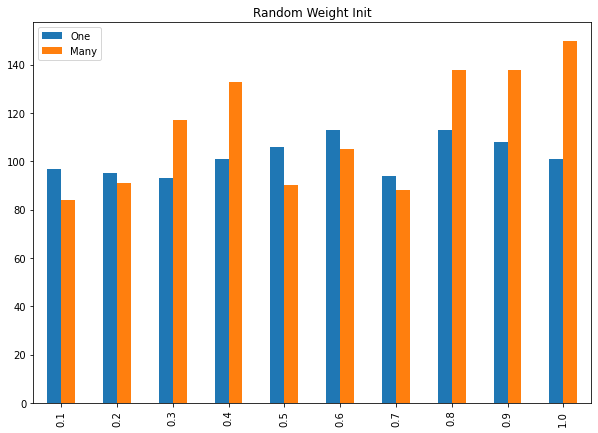

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = (10,7)

X = np.array(lr)
Y = resS3
Z = resM3

df = pd.DataFrame(np.c_[Y,Z], index=X)
df.plot.bar()

plt.title("Random Weight Init")
plt.legend(["One", "Many"])
plt.show()